## Load the Shepp-Logan Phantom

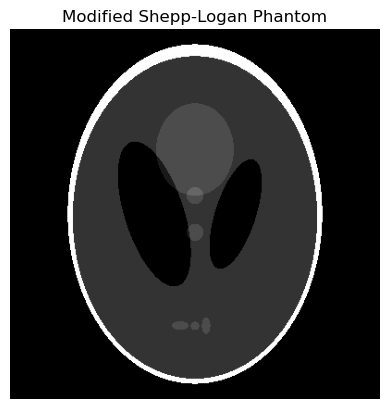

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom

# Generate the Shepp-Logan phantom
phantom = shepp_logan_phantom()

# Display the modified phantom
plt.imshow(phantom, cmap='gray')
plt.axis('off')
plt.title('Modified Shepp-Logan Phantom')
plt.show()

## 1

## Modifying the Phantom

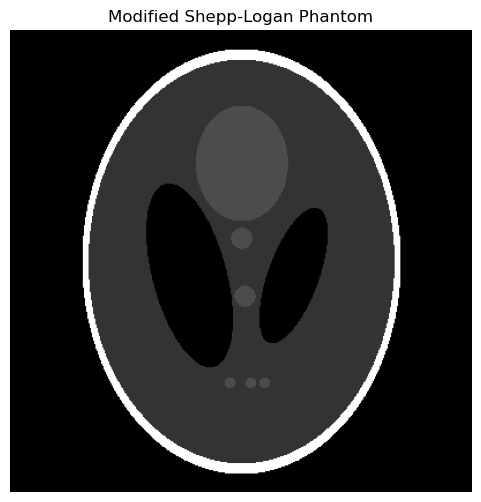

In [94]:
def modified_shepp_logan():
    # Define the parameters for the ellipses in the phantom
    # Each ellipse is defined by: [A, a, b, x0, y0, phi]
    # Where:
    #   A: additive intensity value of the ellipse
    #   a: length of the major axis
    #   b: length of the minor axis
    #   x0, y0: coordinates of the center of the ellipse
    #   phi: rotation angle in degrees
    ellipses = [
        [1,   .69,   .92,    0,      0,   90], #outer ring
        [-.8, .6624, .8740,  0,   -.0184, 90], #2nd outer ring
        [-.2, .1100, .3100,  12,    45, 70], #inner right ellipses
        [-.2, .1600, .4100, 12,    -45, 105], #inner left ellipses
        [ .1, .2500, .2000,  -85,    .35, 0], # 1 upper ellipses
        [ .1, .0460, .0460,  -20,     .1, 0], # 5a
        [ .1, .0460, .0460,  30,    3, 0],  # 5b
        [ .1, .0230, .0230,  105,  20, 0],     # 3c
        [ .1, .0230, .0230,  105,  8, 0],     # 3b
        [ .1, .0230, .0230,  105,  -10, 0]  # 3a
    ]
    
    # Generate the phantom image
    p = np.zeros((400, 400))
    for e in ellipses:
        rr, cc = ellipse(e[3] + 200, e[4] + 200, e[1] * 200, e[2] * 200, shape=p.shape, rotation=np.deg2rad(e[5]))
        p[rr, cc] += e[0]

    return p

# Generate and display the modified phantom
modified_phantom = modified_shepp_logan()

plt.figure(figsize=(6, 6))
plt.imshow(modified_phantom, cmap='gray')
plt.title("Modified Shepp-Logan Phantom")
plt.axis('off')
plt.show()


## 3.1

## Simulating an MRI

/var/folders/vk/j3nq15y951x8l4gj03g63svr0000gn/T/ipykernel_92294/3468225508.py:10: RuntimeWarning: divide by zero encountered in divide
  return A * (1 - np.exp(-TR / T1)) * np.exp(-TE / T2)


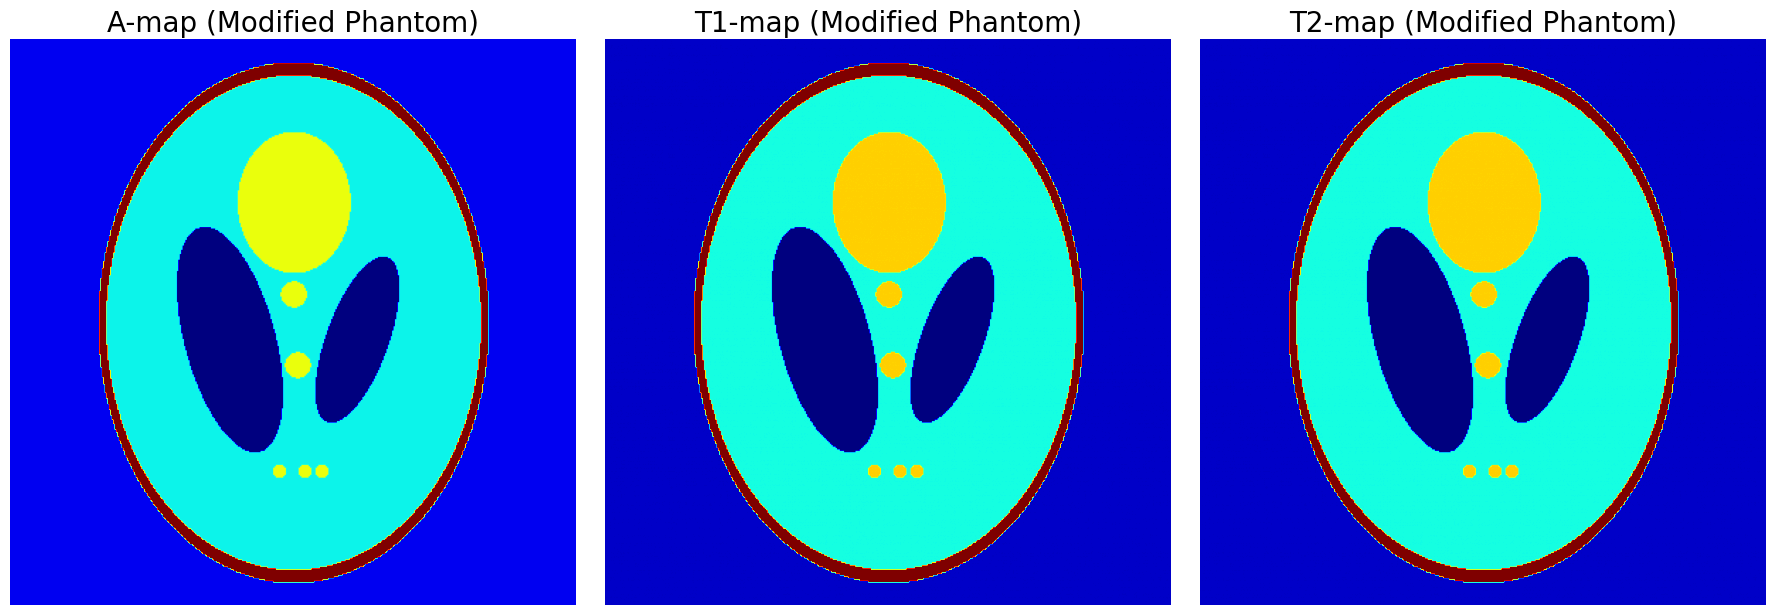

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Define the TR and TE values
TR_values = [50, 250, 1000, 2500]
TE_values = [10 for _ in TR_values]

# Signal Intensity (SI) calculation function
def calculate_SI(A, T1, T2, TR, TE):
    return A * (1 - np.exp(-TR / T1)) * np.exp(-TE / T2)

# Identify unique intensity values in the modified phantom to determine the number of compartments
unique_intensities_modified = np.unique(modified_phantom)

# Number of compartments (excluding background)
num_compartments_modified = len(unique_intensities_modified) - 1

# Assign T1 and T2 values to the compartments
T1_values_modified = 50 + (np.arange(num_compartments_modified) * 250)
T2_values_modified = 10 + (np.arange(num_compartments_modified) * 50)

# Create T1 and T2 maps for modified phantom
T1_map_modified = np.zeros_like(modified_phantom)
T2_map_modified = np.zeros_like(modified_phantom)
for i, intensity in enumerate(unique_intensities_modified[1:]):  # Excluding background intensity
    T1_map_modified[modified_phantom == intensity] = T1_values_modified[i]
    T2_map_modified[modified_phantom == intensity] = T2_values_modified[i]

# Assign A values to compartments
A_values_modified = np.linspace(0.1, 0.9, num_compartments_modified)
A_values_modified[-1] = 1.0  # Set the A value for the brightest compartment to 1.0

# Create A map for modified phantom
A_map_modified = np.zeros_like(modified_phantom)
for i, intensity in enumerate(unique_intensities_modified[1:]):  # Excluding background intensity
    A_map_modified[modified_phantom == intensity] = A_values_modified[i]

# Calculate the SI for each case using the modified phantom
SI_maps_modified = []
for TR, TE in zip(TR_values, TE_values):
    SI_map_modified = calculate_SI(A_map_modified, T1_map_modified, T2_map_modified, TR, TE)
    SI_maps_modified.append(SI_map_modified)

# Display the A-map, T1-map, and T2-map for the modified phantom
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(A_map_modified, cmap='jet')
ax[0].axis('off')
ax[0].set_title("A-map (Modified Phantom)", fontsize=20)
ax[1].imshow(T1_map_modified, cmap='jet')
ax[1].axis('off')
ax[1].set_title("T1-map (Modified Phantom)", fontsize=20)
ax[2].imshow(T2_map_modified, cmap='jet')
ax[2].axis('off')
ax[2].set_title("T2-map (Modified Phantom)", fontsize=20)
plt.tight_layout()
plt.show()


In [105]:
# Extract values for the table
table_values = []

# Iterate over each unique intensity value in the modified phantom to populate the table values
for i, intensity in enumerate(unique_intensities_modified[1:]):  # Excluding background intensity
    A_val = A_map_modified[modified_phantom == intensity][0]
    T1_val = T1_map_modified[modified_phantom == intensity][0]
    T2_val = T2_map_modified[modified_phantom == intensity][0]
    
    # Calculate SI values for each TR and TE pair
    SI_values = [calculate_SI(A_val, T1_val, T2_val, TR, TE) for TR, TE in zip(TR_values, TE_values)]
    
    table_values.append([i + 1, A_val, T1_val, T2_val] + SI_values)

table_values

[[1,
  0.1,
  50.0,
  10.0,
  0.023254415793482964,
  0.0365400688994776,
  0.03678794404131863,
  0.036787944117144235],
 [2,
  0.3666666666666667,
  300.0,
  60.0,
  0.04764848524950242,
  0.175487504030363,
  0.29930425853837506,
  0.3103020273912546],
 [3,
  0.6333333333333333,
  550.0,
  110.0,
  0.05025360553115182,
  0.2112308770817201,
  0.48442757829833666,
  0.5721582960220231],
 [4,
  1.0,
  800.0,
  160.0,
  0.056916160228880366,
  0.2521237840225036,
  0.6702667140842918,
  0.8981381334276782]]

## 3.2

In [106]:
import pandas as pd

# Extracted data from the LaTeX code
data = {
    "Structure Index": [1, 2, 3, 4],
    "A": [0.1, 0.3667, 0.6333, 1.0],
    "T1": [50.0, 300.0, 550.0, 800.0],
    "T2": [10.0, 60.0, 110.0, 160.0],
    "Signal Intensity 1": [0.0233, 0.0476, 0.0503, 0.0569],
    "Signal Intensity 2": [0.0365, 0.1755, 0.2112, 0.2521],
    "Signal Intensity 3": [0.0368, 0.2993, 0.4844, 0.6703],
    "Signal Intensity 4": [0.0368, 0.3103, 0.5722, 0.8981]
}

# Create the DataFrame
df_latex = pd.DataFrame(data)
df_latex.set_index("Structure Index", inplace=True)
df_latex


,A,T1,T2,Signal Intensity 1,Signal Intensity 2,Signal Intensity 3,Signal Intensity 4
Structure Index,,,,,,,
1,0.1000,50.0,10.0,0.0233,0.0365,0.0368,0.0368
2,0.3667,300.0,60.0,0.0476,0.1755,0.2993,0.3103
3,0.6333,550.0,110.0,0.0503,0.2112,0.4844,0.5722
4,1.0000,800.0,160.0,0.0569,0.2521,0.6703,0.8981


## 3.3

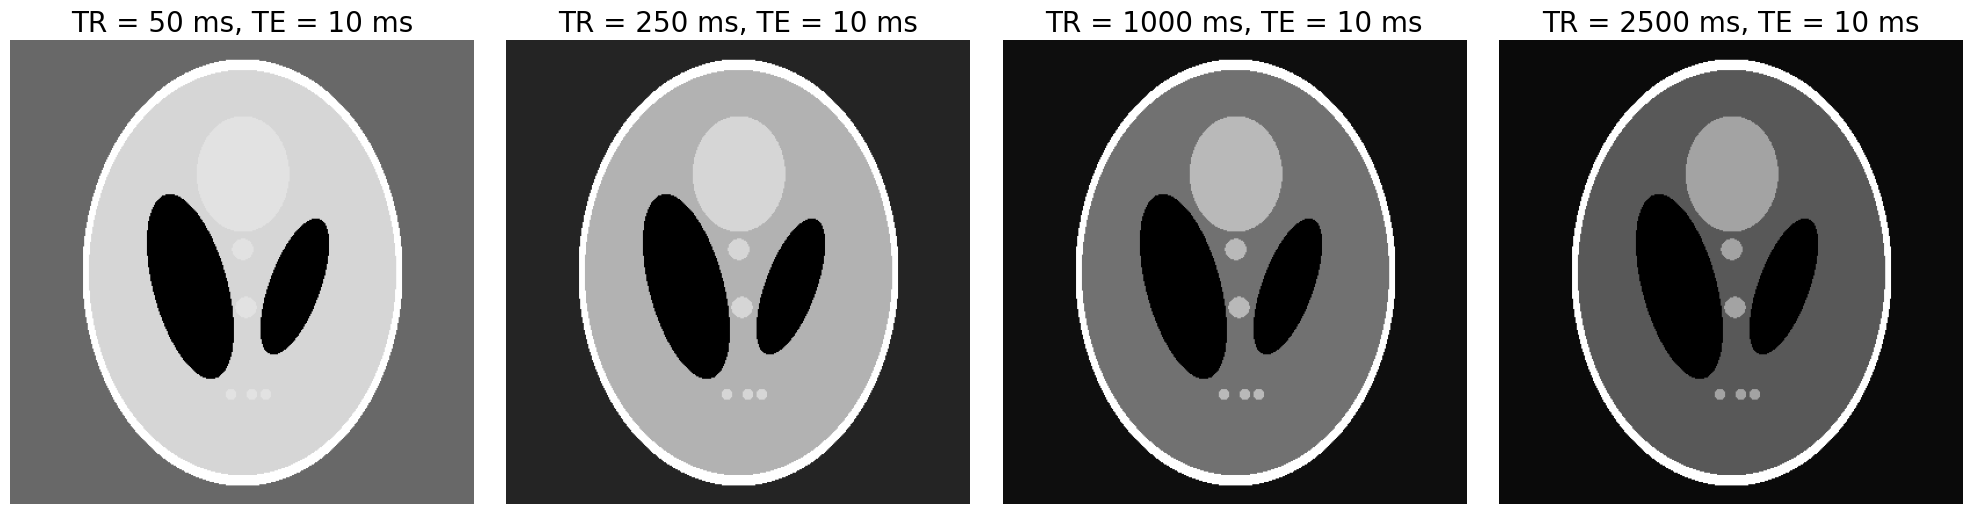

In [112]:
# Display the four generated MRIs next to each other
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, SI_map in enumerate(SI_maps_modified):
    ax[i].imshow(SI_map, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f"TR = {TR_values[i]} ms, TE = {TE_values[i]} ms", fontsize=20)

plt.tight_layout()
plt.show()

#### Here are the four generated MRIs for the modified Shepp-Logan Phantom based on different values of TR (Repetition Time) and a constant TE of 10 ms.

## 3.4

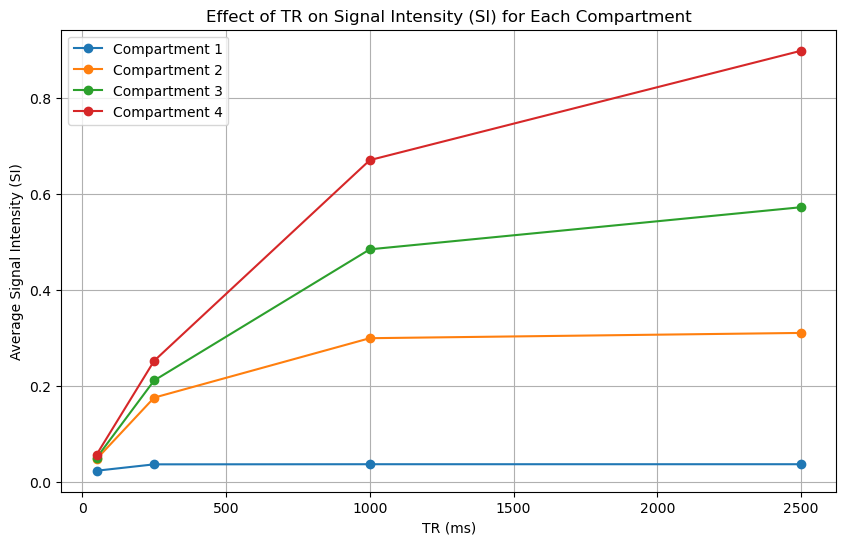

In [115]:
# Extract SI values for each TR for plotting
SI_values_per_compartment = np.array([SI_map[modified_phantom == intensity].mean() for intensity in unique_intensities_modified[1:] for SI_map in SI_maps_modified]).reshape(num_compartments_modified, len(TR_values))

# Plot SI vs. TR for each compartment
plt.figure(figsize=(10, 6))
for i in range(num_compartments_modified):
    plt.plot(TR_values, SI_values_per_compartment[i], 'o-', label=f"Compartment {i+1}")

plt.xlabel('TR (ms)')
plt.ylabel('Average Signal Intensity (SI)')
plt.title('Effect of TR on Signal Intensity (SI) for Each Compartment')
plt.legend()
plt.grid(True)
plt.show()
